# Segments to frames

The goal is to map a sequence of variable-length segments to fixed-length frames.

Input format:

Chords in the annotated dataset are represented in segments. The song is a sequence of segments. Each segment has a start, end time and value (in this case chord label). Segments have to be contuguous, non-overlapping and non-empty. 
The song starts and time 0.0.

Output format:

We'd like to use features like spectrogram, chomagrams, etc. When a digital audio recording is analyzed with such spectral methods, it is split into fixed-size frames. Each frame represents also a time interval with start and end time. Since the signal in each frame is typically windowed and the frames are overlapping we can describe the frame just by the time of its center.

Since we'd like to use the chord annotations as labels for the features we have to map them to frames.

This can be done quite easily. In pseuodocode:

```
for each frame:
    take its center time
    find the segment containing this time
    assign that segment's value as the frame label
```

In [146]:
%pylab inline
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
pylab.rcParams['figure.figsize'] = (12, 6)

Populating the interactive namespace from numpy and matplotlib


In [22]:
segments = pd.DataFrame.from_records([
    (0, 2.4, 'C'),
    (2.4, 2.8, 'F'),
    (2.8, 4.7, 'G'),
    (4.7, 5.2, 'C'),
], columns=['start','end','label'])
segments

,start,end,label
0,0.0,2.4,C
1,2.4,2.8,F
2,2.8,4.7,G
3,4.7,5.2,C


In [52]:
segment_count = len(segments)
total_duration = segments['end'].iloc[-1]
frame_duration = 1.0
hop_duration = 0.5

In [276]:
def time_intervals(segments):
    return [(v['start'], v['end']) for (k,v) in segments[['start', 'end']].iterrows()]

def plot_segments(time_intervals):
    ax = plt.gca()
    for (i, (s, e)) in enumerate(time_intervals):
        j = (i / 5) % 1
        yshift = 0.1 * (abs(j - 0.5) - 0.5)
        ax.add_patch(Rectangle(
                (s, yshift), e-s, yshift + 1, alpha=0.5, linewidth=2,
                edgecolor=(1,1,1), facecolor=plt.cm.jet(j)))
    pad = 0.1
    xlim(0 - pad, total_duration + pad)
    ylim(0 - pad, 1 + pad)

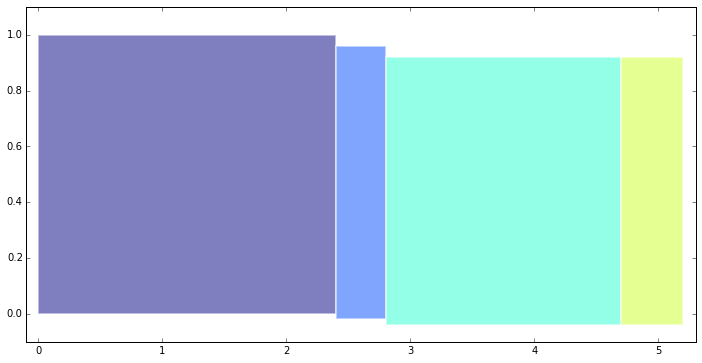

In [277]:
plot_segments(time_intervals(segments))

In [270]:
def frame_count(total_duration, frame_duration, hop_duration):
    return math.ceil((max(total_duration, frame_duration) - frame_duration) / hop_duration + 1)

frame_count(total_duration, frame_duration, hop_duration)

10

In [256]:
def frames(total_duration, frame_duration, hop_duration):
    count = frame_count(total_duration, frame_duration, hop_duration)
    return [(i * hop_duration, i * hop_duration + frame_duration) for i in range(count)]

def frame_centers(total_duration, frame_duration, hop_duration):
    count = frame_count(total_duration, frame_duration, hop_duration)
    return [(0.5  * frame_duration+ i * hop_duration) for i in range(count)]

In [303]:
f_centers = frame_centers(total_duration, frame_duration, hop_duration)
f_centers

[0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0]

In [258]:
f = frames(total_duration, frame_duration, hop_duration)
f

[(0.0, 1.0),
 (0.5, 1.5),
 (1.0, 2.0),
 (1.5, 2.5),
 (2.0, 3.0),
 (2.5, 3.5),
 (3.0, 4.0),
 (3.5, 4.5),
 (4.0, 5.0),
 (4.5, 5.5)]

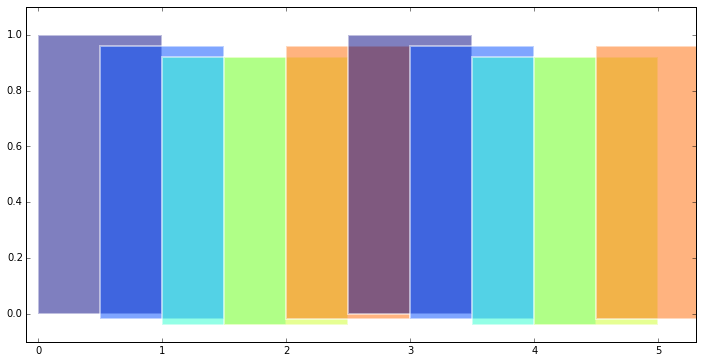

In [278]:
plot_segments(f)

In [317]:
def label_at_time(time, segments):
    labels = segments[(segments['start'] <= time) & (segments['end'] >= time)]['label']
    if len(labels) >= 0:
        return labels.iloc[0]

In [319]:
[label_at_time(t, segments) for t in f_centers]

['C', 'C', 'C', 'C', 'F', 'G', 'G', 'G', 'G', 'C']